# Machine Learning Zoomcamp - Homework 3 - Holley St. Germain

homework: https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/03-classification/homework.md

notebook on github: https://github.com/holleyst/mlzoomcamp2023/blob/main/mlzc_hw3.ipynb

notebook on colab: https://colab.research.google.com/github/holleyst/mlzoomcamp2023/blob/main/mlzc_hw3.ipynb



In [68]:
# import libraries and such
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split


## Dataset
car price dataset

https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

## Features
Use the following columns:
*   Make
*   Model
*   Year
*   Engine HP
*   Engine Cylinders
*   Transmission Type
*   Vehicle Style
*   highway MPG
*   city mpg
*   MSRP

## Data Preparation
*   Transform column names to lowercase and replace spaces with underscores.
*   Fill in missing values with 0.
*   Rename MSRP variable to price.



In [69]:
dataurl = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
hwcols = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

df = pd.read_csv(dataurl, usecols=hwcols)

df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df.fillna(0)
df.rename(columns = {'msrp':'price'}, inplace=True)

df


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


Q1: What is the most frequent observation (mode) for the column transmission_type?


*   AUTOMATIC
*   MANUAL
*   AUTOMATED_MANUAL
*   DIRECT_DRIVE

A1: AUTOMATIC

In [70]:
df.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

Q2: Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?
*   engine_hp and year
*   engine_hp and engine_cylinders
*   highway_mpg and engine_cylinders
*   highway_mpg and city_mpg

A2: highway_mpg and city_mpg

In [85]:
# get numeric columns
dfnum = df.copy()
dfnum = dfnum.select_dtypes(include='number')
dfnum = dfnum.drop('year', axis=1)

# make basic correlation matrix
dfnum.corr()

# correlation values
dfnum.corr().unstack().sort_values(ascending=False)[dfnum.shape[1]:]


city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
price             engine_hp           0.650095
engine_hp         price               0.650095
engine_cylinders  price               0.526274
price             engine_cylinders    0.526274
city_mpg          price              -0.157676
price             city_mpg           -0.157676
                  highway_mpg        -0.160043
highway_mpg       price              -0.160043
                  engine_hp          -0.415707
engine_hp         highway_mpg        -0.415707
city_mpg          engine_hp          -0.424918
engine_hp         city_mpg           -0.424918
engine_cylinders  city_mpg           -0.587306
city_mpg          engine_cylinders   -0.587306
highway_mpg       engine_cylinders   -0.614541
engine_cylinders  highway_mpg        -0.614541
dtype: float64

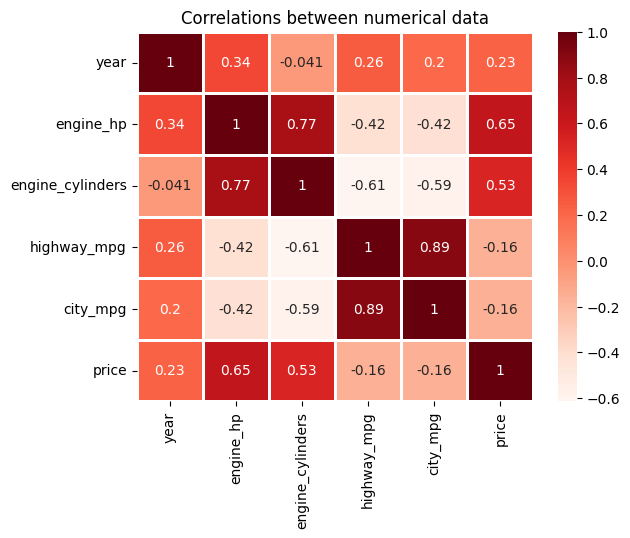

In [72]:
# visualize the correlation matrix
plt.figure()
sns.heatmap(dfnum.corr(), annot=True, linewidths=1, cmap="Reds")
plt.title('Correlations between numerical data')
plt.show()

## Make price binary
*   Turn the price variable from numeric into a binary format.
*   Create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

## Split the data
*   Split your data in train/val/test sets with 60%/20%/20% distribution.
*   Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
*   Make sure that the target value (above_average) is not in your dataframe.


In [73]:
# make price binary
dfbin = df.copy()
mean_price = dfbin.price.mean()
dfbin['above_average'] = np.where(dfbin.price >= mean_price, 1, 0)

# drop price from dataset
dfbin = dfbin.drop('price', axis=1)

# split and process data
# df_train_full: 80%, df_test: 20%
df_train_full, df_test = train_test_split(dfbin, test_size=0.2, random_state=42)
# df_train: 75% of 80% = 60%, df_val: 25% of 80% = 20%
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

Q3:
*   Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
*   Round the scores to 2 decimals using round(score, 2).
*   Which of these variables has the lowest mutual information score?
  *   make
  *   model
  *   transmission_type
  *   vehicle_style

A3: transmission_type (0.02)

In [94]:
# categorical variables
cat = ['make', 'model', 'year', 'transmission_type', 'vehicle_style']
#df_train.columns
#df_train.select_dtypes(include='number')

# calculate mutual information
def calculate_mutual_info(series):
  return round(mutual_info_score(series, df_train.above_average), 2)

df_mutinfo = df_train[cat].apply(calculate_mutual_info)
df_mutinfo = df_mutinfo.sort_values(ascending=True).to_frame(name='mutual information')
df_mutinfo


,mutual information
transmission_type,0.02
year,0.07
vehicle_style,0.08
make,0.24
model,0.46
